In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
import scipy as sp
import random
from factor_analyzer import FactorAnalyzer,calculate_bartlett_sphericity,calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity


#read car data
data = pd.read_csv('data/car_data.csv')
data_ip = data[['Annual Income', 'Price ($)']]

In [155]:
data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23906 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [156]:
#check for missing values
data.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [157]:
data = data.fillna('0')

<Axes: >

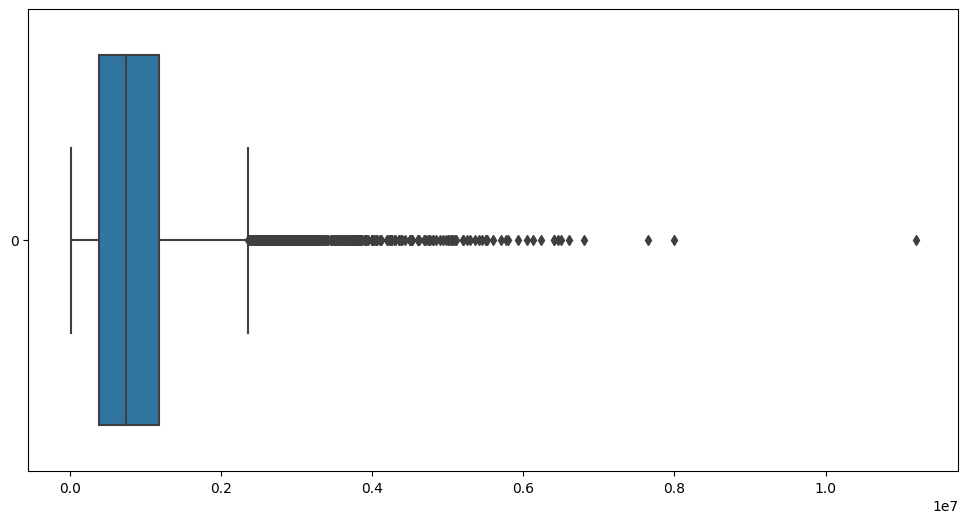

In [159]:
#Boxplot- Annual Income
plt.figure(figsize=(12,6))
sns.boxplot(data=data_ip['Annual Income'], orient='h')

<Axes: >

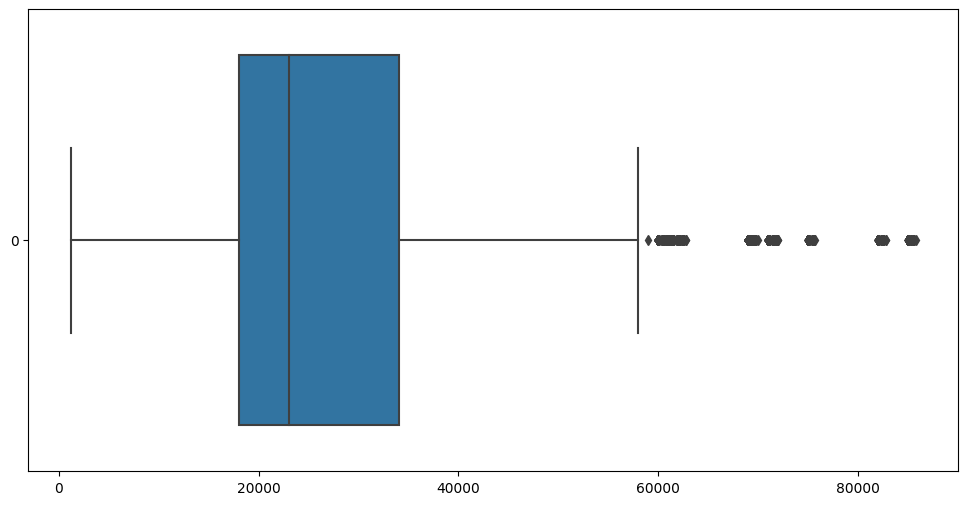

In [160]:
#Boxplot- Price
plt.figure(figsize=(12,6))
sns.boxplot(data=data_ip['Price ($)'], orient='h')

<Axes: >

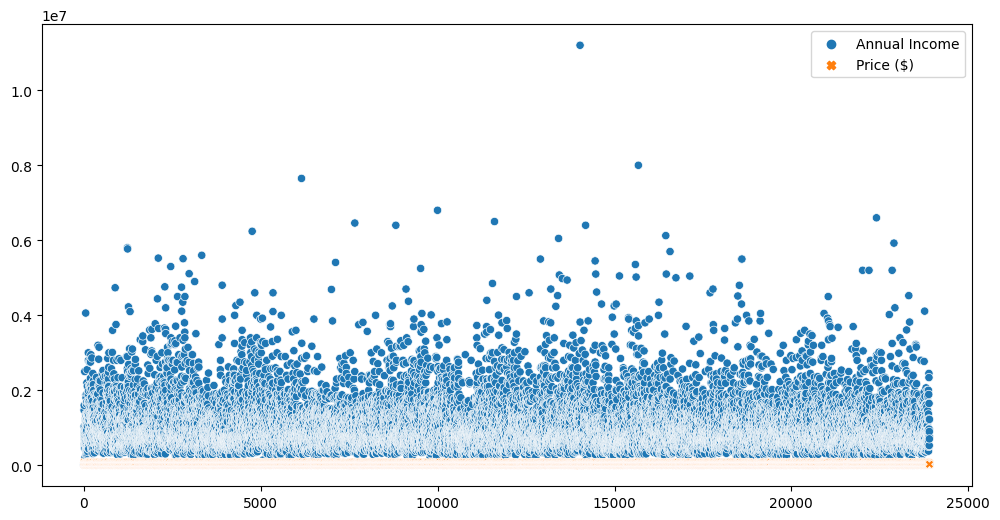

In [161]:
#scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(data_ip)

<Axes: ylabel='Count'>

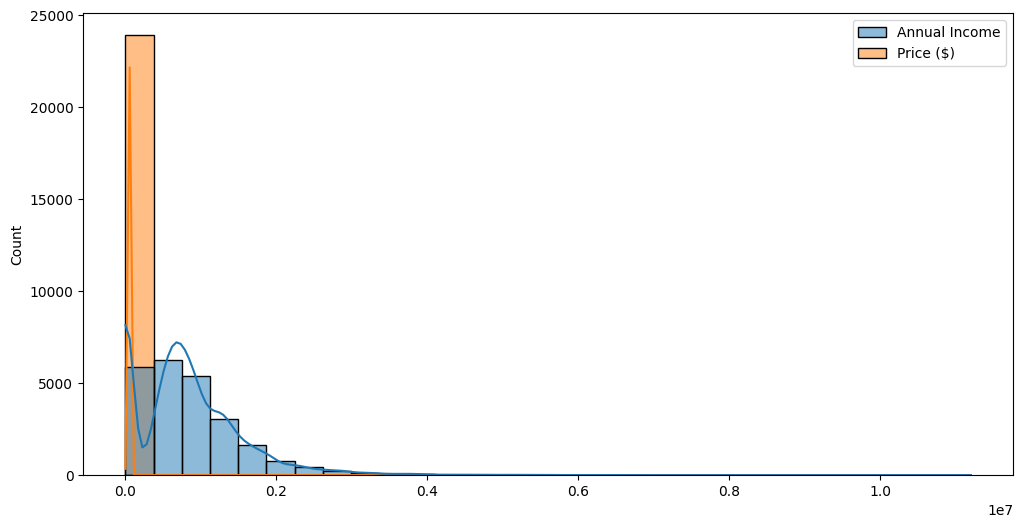

In [162]:
#histogram
plt.figure(figsize=(12,6))
sns.histplot(data_ip, bins=30, kde=True)

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23906 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [164]:
#use pandas to separate the date
data['Date'] = pd.to_datetime(data['Date'])
# store yeat, month, day 
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data.drop('Date', axis=1, inplace=True)
data.head()

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Year,Month,Day
0,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,2022,1,2
1,C_CND_000002,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,2022,1,2
2,C_CND_000003,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,2022,1,2
3,C_CND_000004,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,2022,1,2
4,C_CND_000005,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,2022,1,2


In [165]:
#Encode the categorical data into numerical data
string_columns = data.select_dtypes('object').columns
for col in string_columns:
    label_encoder = LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])

In [166]:
data.head()

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Year,Month,Day
0,0,1051,1,13500,0,8,60,0,0,0,26000,0,3,8264678,4,2022,1,2
1,1,1058,1,1480000,1,7,52,0,0,0,19000,3,3,6848189,0,2022,1,2
2,2,1062,1,1035000,2,4,57,1,1,2,31500,1,2,7298798,2,2022,1,2
3,3,1069,1,13500,4,27,36,1,1,1,14000,6,3,6257557,5,2022,1,2
4,4,1084,1,1465000,3,0,141,0,0,2,24500,2,1,7081483,3,2022,1,2


Number of factors (Kaiser-Guttman rule): 9


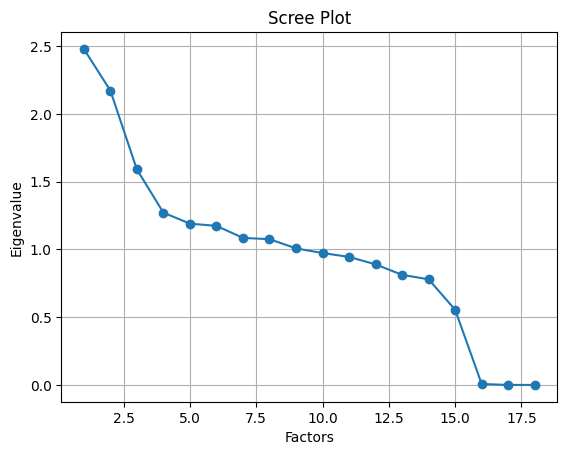

In [167]:
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data)

# Perform factor analysis
corr = np.corrcoef(data_norm, rowvar=False)
n_factors = data.shape[1]
fa = FactorAnalyzer(n_factors, rotation=None)
fa.fit(corr)

# Get factor loadings
loadings = fa.loadings_

ev, v = fa.get_eigenvalues()
idx = np.where(ev > 1)[0]

#counts the number of elements in idx, which represents the number of eigenvalues greater than 1.
n_factors_kg = idx.size
print(f"Number of factors (Kaiser-Guttman rule): {n_factors_kg}")

# Scree plot
plt.plot(range(1,n_factors+1), ev, marker='o')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [168]:
feature_eigenvalues = np.sum(loadings**2, axis=1)

# Print eigenvalues for each feature
for i, eigenvalue in enumerate(feature_eigenvalues):
    print(f"Eigenvalue for feature {i+1}: {eigenvalue}")

Eigenvalue for feature 1: 0.9975476263320915
Eigenvalue for feature 2: 0.9950045646157197
Eigenvalue for feature 3: 0.9950034183873259
Eigenvalue for feature 4: 0.9950039054369804
Eigenvalue for feature 5: 0.995003011763931
Eigenvalue for feature 6: 0.9950030091702051
Eigenvalue for feature 7: 0.995002730717297
Eigenvalue for feature 8: 0.9975017821817442
Eigenvalue for feature 9: 0.9975017821817441
Eigenvalue for feature 10: 0.9950038850975684
Eigenvalue for feature 11: 0.9950033678798309
Eigenvalue for feature 12: 0.9417569191980725
Eigenvalue for feature 13: 0.9950040933747409
Eigenvalue for feature 14: 0.9950042256492004
Eigenvalue for feature 15: 0.9950026045583173
Eigenvalue for feature 16: 0.9969551341251082
Eigenvalue for feature 17: 0.9954810692824911
Eigenvalue for feature 18: 0.9950121149271569


In [169]:
feature_names = data.columns

# Get selected features based on Kaiser-Guttman rule
selected_features_loadings = loadings[:, idx]
print(selected_features_loadings)

# Associate selected feature loadings with feature names
selected_features = []
for i in range(selected_features_loadings.shape[1]):
    factor_loadings = selected_features_loadings[:, i]
    factor_selected_features = [feature_names[j] for j in range(len(factor_loadings)) if abs(factor_loadings[j]) > 0.5]  # Adjust threshold as needed
    selected_features.append(factor_selected_features)

print("Selected features based on Kaiser-Guttman rule:")
for i, factor_features in enumerate(selected_features):
    print(f"Factor {i+1}: {factor_features}")

[[ 0.88931171  0.42316045  0.04667511  0.05209094  0.074652    0.01343508
   0.04660475  0.0226617  -0.02505671]
 [ 0.08974995 -0.02733777 -0.01036124 -0.14698208 -0.73604566 -0.22774141
   0.04548396  0.0634751   0.0188919 ]
 [-0.0741298  -0.14517402 -0.14453448 -0.38867655 -0.06368345  0.50072583
   0.34547296  0.14595327  0.04619241]
 [-0.13849997 -0.20609641 -0.20587299 -0.34705051 -0.03700014  0.42347852
   0.09089344  0.10141382 -0.04717192]
 [-0.03108552 -0.24601906  0.42168865  0.21493698 -0.08178217  0.23516348
  -0.12213287 -0.17704915 -0.68443518]
 [-0.06973768 -0.19751393 -0.41006489  0.46356118  0.01089223 -0.13387011
   0.30471622  0.09512416  0.11421846]
 [-0.25284645  0.21755067 -0.24606345  0.57166853 -0.1267291   0.17612147
  -0.01745596  0.07952847  0.18012519]
 [-0.54907324  0.7950082   0.18940541 -0.07910735  0.01700724 -0.03248575
   0.00857735  0.01902234 -0.02348248]
 [-0.54907324  0.7950082   0.18940541 -0.07910735  0.01700724 -0.03248575
   0.00857735  0.01902

In [170]:
kmo_all, kmo_model = calculate_kmo(selected_features_loadings)
print('KMO Model Score:', kmo_model)

KMO Model Score: 0.49395144721367323


c:\Users\27929\anaconda3\envs\tensorflow_cpu\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [171]:
# Perform Bartlett's test for sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data)
print(f"Chi-square value: {chi_square_value}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject null hypothesis: The observed correlation matrix is not an identity matrix.")
else:
    print("Fail to reject null hypothesis: The observed correlation matrix is an identity matrix.")

Chi-square value: nan
P-value: nan
Fail to reject null hypothesis: The observed correlation matrix is an identity matrix.


c:\Users\27929\anaconda3\envs\tensorflow_cpu\lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
